In [1]:
import pandas as pdr
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def get_requirements():
    print("Artificial Intelligence")
    print("\nProgram Requirements:")
    print("1. Automate data manipulation process.")
    print("2. Easily reproduce analysis on different datasets using similar fonts--saves time!")
    print("3. Import necessary libraries.")
    print("4. Research how to install any missing packages, if necessary")
    print("5. Create at least three functions that are called by the program")
    print("\ta. main(): calls at least two other functions.")
    print("\tb. get_requirements(): displays the program requirements.")
    print("\tc. artificial_intelligence(): displays the following data.")


In [3]:
def artifical_intelligence():
    df = pdr.read_csv("pima-indians-diabetes.csv")
    print("1. Print indexes;")
    print(df.index)
    print("\n2. Print Columnds")
    print(df.columns)
    print("\n3. Print data frame:\n")
    print(df)
    print("\n4. Print type:")
    print(type(df))
    print("\n5. Print attribute data types--object type represents strings (e.g. 'M' and 'F' in sex):")
    print(df.dtypes)
    print("\n6. Print values (truncated list), in array format:")
    print(df.values)
    print("\n7. Print index of all DataFrame column names:")
    print(df.columns)
    print("\n8. Print DataFrame info (i.e. , summary, similar to 'describe tablename;' in MySQL)")
    df.info()
    print("\n9. Print *only* number of DataFrame rows:")
    print(len(df))
    print("\n10. Print *only* number of DataFrame columns:")
    print(len(df.columns))
    print("\n11. Print number of DataFrame rows and columns:")
    """
    x = len(df)
    y = len(df.columns)
    print(f"({x}, {y})")
    """
    print(df.shape)#tuple object
    print("\n12. Print number of dataframe elements (i.e., rows * columns):")
    print(df.size)
    
    print("\n13. Cleaning Data:")
    all_cols = ['num_preg', 'gluc_concentrate', 'blood_press', 'triceps', 'insulin', 'bmi', 'pedigree', 'age', 'class']
    cols_to_norm = ['num_preg', 'gluc_concentrate', 'blood_press', 'triceps', 'insulin', 'bmi', 'pedigree']
    df[cols_to_norm] = df[cols_to_norm].apply(
        lambda x: (x - x.min())/(x.max() - x.min()))
    print("\n14. Begin TensorFlow Analysis - create variables:")
    num_preg = tf.feature_column.numeric_column('num_preg')
    plasma_gluc = tf.feature_column.numeric_column('gluc_concentrate')
    dias_press = tf.feature_column.numeric_column('blood_press')
    tricep = tf.feature_column.numeric_column('triceps')
    insulin = tf.feature_column.numeric_column('insulin')
    bmi = tf.feature_column.numeric_column('bmi')
    diabetes_pedigree = tf.feature_column.numeric_column('pedigree')
    age = tf.feature_column.numeric_column('age')
    
    print("\n15. Create (generic) categorical features (used for analysis):")
    assigned_group = tf.feature_column.categorical_column_with_vocabulary_list(
        'Group', ['A','B','C','D'])
    df['age'].hist(bins=20)
    plt.legend(['diabetes occurneces per age group'])
    plt.show()
    
    print("\n16. Combining features:")
    age_groups = tf.feature_column.bucketized_column(
        age, boundaries=[20, 30, 40, 50, 60, 70, 80])
    
    feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, age_groups]
    x_data = df.drop('class', axis=1)
    labels = df['class']
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, labels, test_size=0.33, random_state=101)
    
    input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=x_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)
    model= tf.estimator.LinearClassifier(
        feature_columns=feat_cols, n_classes=2)
    model.train(input_fn=input_func, steps=1000)
    
    pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test, batch_size=10, num_epochs=1, shuffle=False)
    
    predictions = model.predict(pred_input_func)
    list(predictions)
    
    eval_input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=x_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)
    results = model.evaluate(eval_input_func)
    print(results)

In [4]:
def main():
    get_requirements()
    artifical_intelligence()


Artificial Intelligence

Program Requirements:
1. Automate data manipulation process.
2. Easily reproduce analysis on different datasets using similar fonts--saves time!
3. Import necessary libraries.
4. Research how to install any missing packages, if necessary
5. Create at least three functions that are called by the program
	a. main(): calls at least two other functions.
	b. get_requirements(): displays the program requirements.
	c. artificial_intelligence(): displays the following data.
1. Print indexes;
RangeIndex(start=0, stop=768, step=1)

2. Print Columnds
Index(['num_preg', 'gluc_concentrate', 'blood_press', 'triceps', 'insulin',
       'bmi', 'pedigree', 'age', 'class'],
      dtype='object')

3. Print data frame:

     num_preg  gluc_concentrate  blood_press  triceps  insulin   bmi  \
0           6               148           72       35        0  33.6   
1           1                85           66       29        0  26.6   
2           8               183           64     

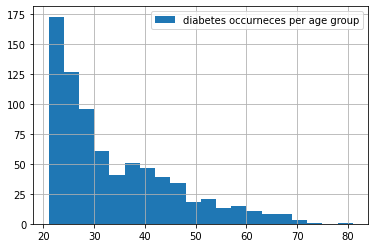


16. Combining features:

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Alex\\AppData\\Local\\Temp\\tmpcj16b_m3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for upda

C:\Users\Alex\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Alex\AppData\Local\Temp\tmpcj16b_m3\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 310.585
INFO:tensorflow:loss = 0.6415562, step = 100 (0.323 sec)
INFO:tensorflow:global_step/sec: 484.548
INFO:tensorflow:loss = 0.61680853, step = 200 (0.206 sec)
INFO:tensorflow:global_step/sec: 451.641
INFO:tensorflow:loss = 0.722505, step = 300 (0.221 sec)
INFO:te

In [5]:
main()